# EDA on Significant Earthquakes, 1965-2016

Dataset: https://www.kaggle.com/datasets/usgs/earthquake-database

This dataset has earthquakes with magnitude 5.5 or higher.

# Objectives
- Explore features in the dataset
- Observe missing values
- Univariate Analysis with depth and magnitude as well as longitudes and latitudes
- Magnitude Analysis by Year
- Magnitude Analysis by Depth

## Import Libraries

In [123]:
import pandas as pd
import missingno as msno
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [44]:
# show all columns
pd.set_option('display.max_columns', None)

## Import Data

In [45]:
df = pd.read_csv('significant_earthquakes_1965_2016.csv')

Originally, this dataset contains 21 columns. But, we will only keep 8 columns.

Date and time columns:
- Date
- Time

Numeric columns:
- Latitude
- Longitude
- Depth
- Magnitude

Categorical columns:
- Type
- Magnitude Type

In [46]:
drop_cols = [
    'ID',
    'Source',
    'Location Source',
    'Magnitude Source',
    'Magnitude Error',
    'Magnitude Seismic Stations',
    'Azimuthal Gap',
    'Horizontal Distance',
    'Horizontal Error',
    'Root Mean Square',
    'Depth Seismic Stations',
    'Depth Error',
    'Status'
]
df.drop(drop_cols, axis=1, inplace=True)

In [47]:
df.head()

Date      Time  Latitude  Longitude        Type  Depth  Magnitude  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6        6.0   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0        5.8   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0        6.2   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0        5.8   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0        5.8   

  Magnitude Type  
0             MW  
1             MW  
2             MW  
3             MW  
4             MW

In [48]:
df.shape

(23412, 8)

23412 earthquakes are recorded in the dataset.

### Missing Values

<AxesSubplot:>

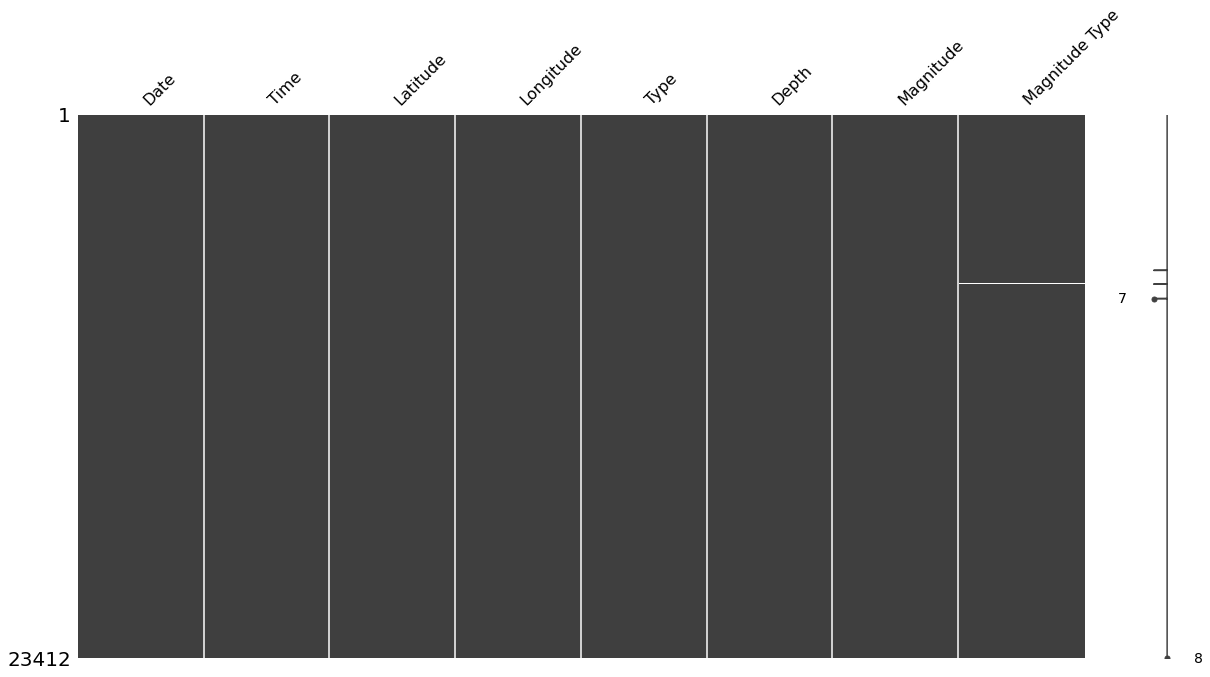

In [49]:
msno.matrix(df, figsize=(20, 10))

Very few values are missing according to the above chart.

## Univariate Analysis (Explore each column)

Let's use a scatter plot based on longitudes and latitudes.

In [14]:
fig = go.Figure(data=go.Scattergeo(
        lon = df['Longitude'],
        lat = df['Latitude'],
        mode = 'markers',
        ))

fig.update_layout(
        title = 'Earthquake',
    )
fig.show()

From the below box plot and distplot, we know that the depth is heavily skewed toward 0.

In [17]:
hist_data = [df['Depth']]
group_labels = ['Depth']
fig1 = px.box(y=df['Depth'],template= 'plotly_dark', title = 'Depth (BoxPlot)')
fig2 = ff.create_distplot(hist_data, group_labels, show_hist=False)
fig2.layout.template = 'plotly_dark'
fig1.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig2.update_layout(title='Depth (DistPlot)', font = dict(size=17, family="Franklin Gothic")) 
fig1.show()
fig2.show()

7722 earthquakes have been reported to have `MW` as a magnitude type.

In [22]:
magnitude_type = [
    'MW', 'ML', 'MH', 'MS',
    'MB', 'MWC', 'MD', 'MWB',
    'MWW', 'MWR'
]

plt.figure(figsize=(20,5))
fig = px.bar(x = magnitude_type, 
       y = df['Magnitude Type'].value_counts().values,
       color = remote_type,
       color_discrete_sequence=px.colors.sequential.dense,
       text=df['Magnitude Type'].value_counts().values,
       title = 'Magnitude Type Distribution',
       template='plotly_dark')

fig.update_traces(width=0.4)

fig.data[0].marker.line.width = 2


fig.update_layout(
    xaxis_title="Magnitude Type",
    yaxis_title="count",
    font = dict(size=17,family="Franklin Gothic"))
fig.show()

<Figure size 1440x360 with 0 Axes>

### Magnitude Analysis by Year

We convert date string to datetime.

In [108]:
df['datetime'] = pd.to_datetime(df['Date'])

We extract years from date.

In [119]:
df['year'] = df['Date'].str[-4:]

In [140]:
date = range(2016,1970,-1)

df_year_list = [
    df.loc[df['year'] == f'{each}']
    for each in date
]

hist_data = [
    each['Magnitude']
    for each in df_year_list
]

group_labels = [
    f'{each}'
    for each in date
]

lst = [
    each['Magnitude'].mean()
    for each in df_year_list
]

fig1 = ff.create_distplot(hist_data, group_labels, show_hist=False, colors=colors)
fig2 = go.Figure(data=px.bar(x= group_labels, 
                            y=lst,
                            color = group_labels,
                            color_discrete_sequence= colors,
                            title='2. Mean Magnitude by Year',
                            text = np.round([num/1000 for num in lst],2),
                            template = 'plotly_dark',
                            height=500))

fig1.layout.template = 'plotly_dark'
fig1.update_layout(
    title='1. Magnitude Distribution by Year',
    font = dict(size=17,family="Franklin Gothic")
)
fig2.update_traces(width=0.4)
fig2.update_layout(
    xaxis_title="Year",
    yaxis_title="Mean Magnitude",
    font = dict(size=17,family="Franklin Gothic"))
fig1.show()
fig2.show()

The mean of magnitude by each year is uniformly distributed, and all of the distribution of earthquake magnitude have similar shapes.

### Magnitude Analysis by Depth

<AxesSubplot:xlabel='Magnitude', ylabel='Depth'>

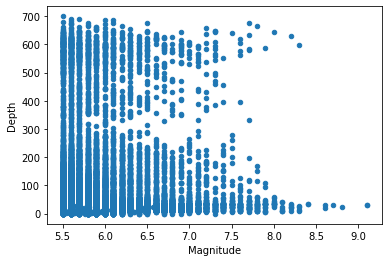

In [142]:
df.plot.scatter(x='Magnitude', y='Depth')

Interestingly, earthquakes with a relatively high degree of magnitude occurred between 1965 and 2016 tend to be either shallow or deep.